<a href="https://colab.research.google.com/github/danielsitepu36/ML-Flowers-Multi_Layer_Perceptron/blob/main/Tugas_ML_MLP_Adhit_Daniel_Rian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Multi Layer Perceptron

Alexius Adhitya K            - 18/424179/PA/18284\
Daniel Suranta Sitepu       - 18/424185/PA/18290\
Fransiskus Rian Wardana P   - 18/427592/PA/18552

Spesifikasi:
Multi Layer Perceptron => 1 hidden layer

Ukuran gambar: 320p x 240p, jika tidak sesuai, resize ke 320x240\
Jumlah neuron pada input layer: 320x240 = 76800\
Jumlah neuron pada hidden layer: 80\
Jumlah neuron pada output layer: 3 (one hot encoding)\
Jumlah class: 3 => [rose, sunflower, dandelion]\
Jumlah data per class: 100 gambar, 80 train data, 20 test data

### Import Libraries

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from PIL import Image
from random import shuffle
import numpy as np
from google.colab import drive
import zipfile

### Fungsi Definisi Arsitektur

In [2]:
def defineStructure(X, Y):
    input = X.shape[0]  # size of input layer
    hidden = 80         # hidden layer of size 4
    output = Y.shape[0] # size of output layer
    return (input, hidden, output)

# (input, hidden, output) = define_structure(X_TRAIN, Y_TRAIN)
# print("The size of the input layer is:  = " + str(input_unit))
# print("The size of the hidden layer is:  = " + str(hidden_unit))
# print("The size of the output layer is:  = " + str(output_unit))

### Fungsi Load Dataset - Visualisasi Data

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
FILE_PATH = '/content/drive/MyDrive/File Tugas PP dan ML/flowers.zip'

EXTRACTED_PATH = '/tmp/flowers/'
RESIZED_PATH = '/tmp/resized/'
FINAL_PATH = '/tmp/final/'
CLASSES = ['rose', 'sunflower', 'dandelion']

## Extracting zip file to '/tmp/flowers'
zip_ref = zipfile.ZipFile(FILE_PATH, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

img_folders = os.listdir(EXTRACTED_PATH)
USED_CLASSES = [x for x in img_folders if x in CLASSES]

# Resizing images
ROSE_DATA = []
SUNFLOWER_DATA = []
DANDELION_DATA = []

def loadData():
    for folder in USED_CLASSES:
        img_files = os.listdir(EXTRACTED_PATH + folder)
        number = 0
        for item in img_files:
            if item.endswith(".jpg") and number < 100:
                os.makedirs(os.path.dirname(RESIZED_PATH + folder + '/'), exist_ok=True)
                img = Image.open(EXTRACTED_PATH + folder + '/' + item)
                new_img = img.resize((320, 240))
                new_img.save(RESIZED_PATH + folder + '/' + item)
                if folder == 'rose':
                    ROSE_DATA.append((item, folder))
                if folder == 'sunflower':
                    SUNFLOWER_DATA.append((item, folder))
                if folder == 'dandelion':
                    DANDELION_DATA.append((item, folder))
                number+=1

loadData()

In [5]:
shuffle(ROSE_DATA)
shuffle(SUNFLOWER_DATA)
shuffle(DANDELION_DATA)

print(len(ROSE_DATA))
print(ROSE_DATA[0][0])
# 12313123123.jpg
print(ROSE_DATA[0][1])
# rose

100
102501987_3cdb8e5394_n.jpg
rose


['rose', 'dandelion', 'sunflower']
5
['rose', 'dandelion', 'sunflower']
5
['rose', 'dandelion', 'sunflower']
5


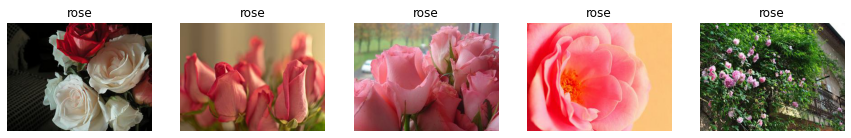

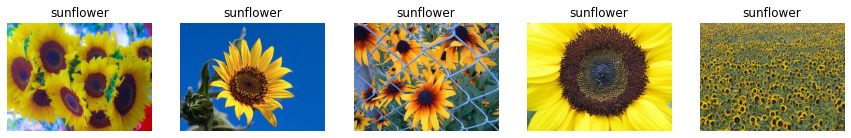

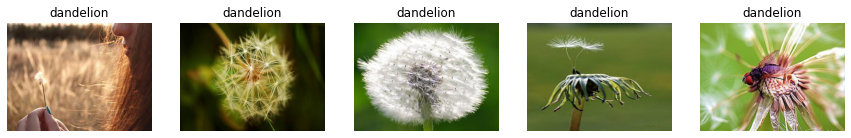

In [6]:
def displayImages(images, final=False, cols=5):
  #Display given images and their labels in a grid
  rows = int(math.ceil(len(images) / cols))
  fig = plt.figure()
  fig.set_size_inches(cols * 3, rows * 3)
  result = []
  if final:
      folder = FINAL_PATH
  else:
      folder = RESIZED_PATH
  subdirs = os.listdir(folder)
  print(subdirs)
  for subdir in subdirs:
      
      # examples of RESIZED_PATH:
      # /tmp/resized/{dandelion,rose,sunflower}/gambar
      # /tmp/final/{test_data,train_data}/gambar
      dir_items = os.listdir(folder + subdir)
      for img in images:
          if img[0] in dir_items:
            result.append((Image.open(folder + subdir + '/' + img[0]), img[1]))
#   images = [(Image.open(folder + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
  print(len(result))
  for i, (image, image_class) in enumerate(result):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(image_class)
    if final:
        plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
    else:
        plt.imshow(image)
    
displayImages(ROSE_DATA[:5], False)
displayImages(SUNFLOWER_DATA[:5], False)
displayImages(DANDELION_DATA[:5], False)

['rose', 'dandelion', 'sunflower']
5
['rose', 'dandelion', 'sunflower']
5


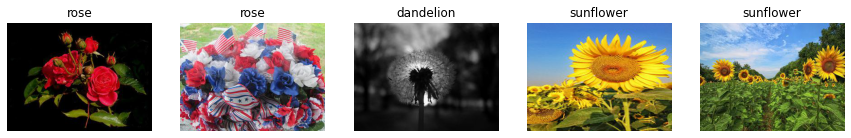

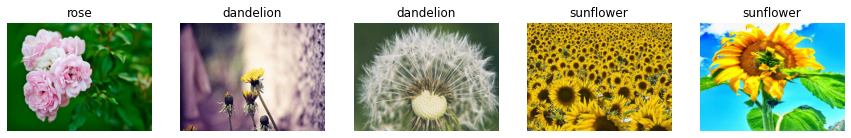

In [7]:
TRAIN_DATA = ROSE_DATA[:80] + SUNFLOWER_DATA[:80] + DANDELION_DATA[:80]
TEST_DATA = ROSE_DATA[80:] + SUNFLOWER_DATA[80:] + DANDELION_DATA[80:]
shuffle(TRAIN_DATA)
shuffle(TEST_DATA)
displayImages(TRAIN_DATA[:5], False)
displayImages(TEST_DATA[:5], False)

### Fungsi Grayscale

In [8]:
def convert2Grayscale(images, folder_name):
    os.makedirs(os.path.dirname(FINAL_PATH + folder_name + '/'), exist_ok=True)
    images2convert = [(Image.open(RESIZED_PATH + images[x][1] + '/' + images[x][0]), images[x][1]) for x in range(len(images))]
    for i, (image, image_class) in enumerate(images2convert):
        new_image = image.convert('L')
        new_image.save(FINAL_PATH + folder_name + '/' + images[i][0])

convert2Grayscale(TRAIN_DATA, "train_data")
convert2Grayscale(TEST_DATA, "test_data")
print(TRAIN_DATA[:5], TEST_DATA[:5])

[('10541580714_ff6b171abd_n.jpg', 'sunflower'), ('2065522422_cfdd80044a_n.jpg', 'rose'), ('14221192676_eb8c89a7d6_n.jpg', 'rose'), ('14646283472_50a3ae1395.jpg', 'sunflower'), ('5647842237_b1c5196718_n.jpg', 'dandelion')] [('7132677385_bcbdcc6001.jpg', 'dandelion'), ('6204049536_1ac4f09232_n.jpg', 'sunflower'), ('34695605616_3b05bb1ef5_n.jpg', 'sunflower'), ('27299697786_75340698c5_n.jpg', 'dandelion'), ('5249439791_196b4e7fc7.jpg', 'rose')]


['train_data', 'test_data']
5
['train_data', 'test_data']
5


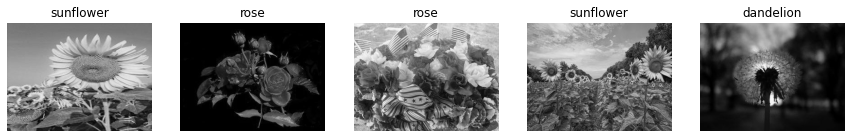

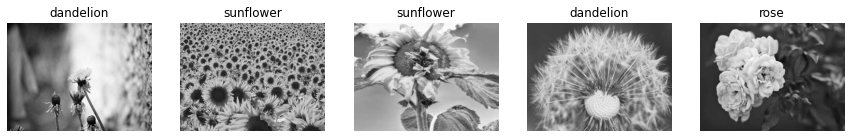

In [9]:
displayImages(TRAIN_DATA[:5], True)
displayImages(TEST_DATA[:5], True)

### Image to numpy array

In [11]:
def convert2npArray(images, folder_name):
    """
    params:
    -------
    images: list([nama_file, flower_class])
    folder_name: str(roses | dandelion | sunflower | train_data | test_data)
    
    returns:
    --------
    tuple(np.ndarray(X), list(classes))
    """
    array = []
    flowers = []
    for img, flower in images:
        data = np.asarray(Image.open(FINAL_PATH + folder_name + img))
        # print(type(data))
        # print(data.shape)
        array.append((data/255.0).flatten())
        # if flower == "rose":
        #   flowers.append(np.array([0,0], dtype=np.float64))
        # if flower == "dandelion":
        #   flowers.append(np.array([0,1], dtype=np.float64))
        # if flower == "sunflower":
        #   flowers.append(np.array([1,0], dtype=np.float64))
        if flower == "rose":
          flowers.append(np.array([0,0,1], dtype=np.float64))
        if flower == "dandelion":
          flowers.append(np.array([0,1,0], dtype=np.float64))
        if flower == "sunflower":
          flowers.append(np.array([1,0,0], dtype=np.float64))
    return np.array(array, dtype=np.float64), np.array(flowers, dtype=np.float64)



TRAIN_X, TRAIN_Y = convert2npArray(TRAIN_DATA, "train_data/")
TEST_X, TEST_Y = convert2npArray(TEST_DATA, "test_data/")
X_train = TRAIN_X.T
# print(TRAIN_Y.shape)
Y_train = TRAIN_Y.T.reshape(3, TRAIN_Y.shape[0])
# print(Y_train.shape)
X_test = TEST_X.T
Y_test = TEST_Y.T.reshape(3, TEST_Y.shape[0])
# print(TRAIN_X.shape)
# print(X_train)
# print(TRAIN_Y)
# print(TRAIN_Y)
# for i in range(Y_train.shape[1]):
#   print(Y_train[:,i])

print ('Train X Shape:', X_train.shape)
print ('Train Y Shape:', Y_train.shape)

print ('\nTraining data = {}'.format(X_train.shape[1]))
print ('Testing data = {}'.format(X_test.shape[1]))

print ('\nTest X Shape: ', X_test.shape)

Train X Shape: (76800, 240)
Train Y Shape: (3, 240)

Training data = 240
Testing data = 60

Test X Shape:  (76800, 60)


### Fungsi Aktivasi Sigmoid

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Fungsi Backpropagation - Init bobot dan bias

In [13]:
def parametersInitialization(input_unit, hidden_unit, output_unit):
    # np.random.seed(2) 
    print(input_unit, hidden_unit, output_unit)
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Fungsi Backpropagation - Error

In [16]:
def crossEntropyCost(A2, Y):
    # number of training example
    m = Y.shape[1] 
    total_cost = 0
    # print(A2.shape)
    # print(Y.shape[1])
    # print(A2[:,1])
    # Compute the cross-entropy cost
    for i in range(len(Y)):
      logprobs = np.multiply(np.log(A2), Y[i]) + np.multiply((1-Y[i]), np.log(1 - A2))
      cost = - np.sum(logprobs) / m
      cost = float(np.squeeze(cost))
      # print(cost)
      total_cost+=cost
    # print(total_cost)
    total_cost/=len(Y)
    return total_cost

def crossEntropyCostDef(A2, Y):
    # number of training example
    m = Y.shape[1] 
    # print(A2)
    # print(len(Y))
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    return cost

def gradientDescent(parameters, grads, learning_rate = 0.1):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

parameters = parametersInitialization(76800, 80, 3)

A2, cache = forwardPropagation(X_train, parameters)
# print(parameters)
cost = crossEntropyCostDef(A2, Y_train)
print(cost)
print(A2.shape)
# cost = crossEntropyCostDef(A2, Y_train, parameters)
# print(cost)

# grads = backwardPropagation(parameters, cache, X_train, Y_train)
# parameters = gradientDescent(parameters, grads, 0.1)
# A2, cache = forwardPropagation(X_train, parameters)
# cost = crossEntropyCostDef(A2, Y_train)
# print(cost)

76800 80 3
2.085170644199967
(3, 240)


### Fungsi Backpropagation - Feedforward

In [17]:
def forwardPropagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

### Fungsi Backpropagation - Backward

In [18]:
def backwardPropagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

### Fungsi Backpropagation - Prediksi

In [19]:
def predictionBin(parameters, X, Y):
    A2, cache = forwardPropagation(X, parameters)
    predictions = np.round(A2)
    return predictions

def prediction(parameters, X, Y):
    A2, cache = forwardPropagation(X, parameters)
    predictions = (np.argmax(A2, axis=0))
    # print((np.argmax(Y, axis=0)))
    return predictions

p = prediction(parameters,X_train,Y_train)
print(p)
# print(Y_train)
print((np.argmax(Y_train, axis=0)))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 2 2 0 1 0 0 0 1 2 0 2 0 1 2 2 0 1 1 2 1 2 0 1 0 2 0 2 0 1 2 0 2 2 1 0 1
 1 0 0 2 2 2 2 2 2 1 2 0 1 0 2 1 2 0 1 2 2 1 1 1 2 0 1 0 2 0 0 1 1 2 1 1 2
 2 1 1 2 0 2 1 1 1 0 2 1 1 1 1 2 2 2 1 2 2 1 2 0 2 0 0 2 2 2 0 1 1 1 1 0 0
 0 2 0 0 2 0 0 0 2 1 1 2 2 2 1 1 2 0 0 2 0 1 1 1 0 1 0 1 1 0 0 1 2 1 0 1 2
 0 0 1 1 2 1 2 0 0 0 1 0 2 0 0 1 1 1 1 0 1 0 1 0 1 0 2 2 0 2 0 0 1 1 2 0 2
 1 0 0 2 0 0 2 1 2 1 2 1 1 0 2 2 0 1 2 0 0 2 0 2 2 0 0 0 0 0 2 0 1 0 2 1 2
 2 1 2 1 2 1 1 2 0 1 0 1 2 2 1 2 1 0]


### Fungsi Backpropagation - Akurasi

In [20]:
def accuracy(predictions, Y):
    real = np.argmax(Y, axis=0)
    dataLength = len(predictions)
    acc = 0
    error = 0
    for i in range(len(predictions)):
        if predictions[i] == real[i]:
            acc += 1
        else:
            error += 1
    acc = (acc/dataLength)
    error = (error/dataLength)
    # print(f'acc = {acc}\terr = {error}')
    return acc, error
    
def accuracyBin(predictions, Y):
    real = Y
    dataLength = predictions.shape[1]
    acc = 0
    error = 0
    for i in range(dataLength):
        if predictions[0][i]==real[0][i] and predictions[1][i]==real[1][i]:
            acc += 1
        else:
            error += 1
    acc = acc/dataLength
    error = error/dataLength
    # print(f'acc = {acc}\terr = {error}')
    # print(predictions)
    # print(Y)
    return acc, error

print(accuracy(p, Y_train))

(0.3333333333333333, 0.6666666666666666)


### Fungsi Backpropagation - Model Training Testing

In [28]:
def training(X, Y, hidden_unit, num_iterations = 1000, learning_rate = 0.1):
    # np.random.seed(3)
    input_unit = defineStructure(X, Y)[0]
    output_unit = defineStructure(X, Y)[2]
    # print("Output:",output_unit)
    
    parameters = parametersInitialization(input_unit, hidden_unit, output_unit)
    # print(parameters)

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    accList = []
    error = []
    for i in range(0, num_iterations):
        A2, cache = forwardPropagation(X, parameters)
        cost = crossEntropyCostDef(A2, Y)
        grads = backwardPropagation(parameters, cache, X, Y)
        parameters = gradientDescent(parameters, grads, learning_rate)
        predictions = prediction(parameters, X, Y)
        acc, err = accuracy(predictions, Y)
        # predictions, acc, err = prediction(parameters, X, Y)
        accList.append(acc)
        error.append(err)
        if i % 5 == 0:
            print ("[Cost, Acc, Err] after iteration %i: %f %f %f" %(i, cost, acc, err))
    
    return parameters, accList, error, predictions


#### Learning Rate 0.1

In [50]:
print("TRAINING (LR 0.1):")
(input_unit, hidden_unit, output_unit) = defineStructure(X_train, Y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))
parameters, accList, errorList, predictions = training(X_train, Y_train, 80, num_iterations=50, learning_rate=0.1)
# print(predictions)
# # print(Y_train)
# print(np.argmax(Y_train, axis=0))

TRAINING (LR 0.1):
The size of the input layer is:  = 76800
The size of the hidden layer is:  = 80
The size of the output layer is:  = 3
76800 80 3
[Cost, Acc, Err] after iteration 0: 2.070404 0.333333 0.666667
[Cost, Acc, Err] after iteration 5: 1.900033 0.450000 0.550000
[Cost, Acc, Err] after iteration 10: 1.890213 0.487500 0.512500
[Cost, Acc, Err] after iteration 15: 1.880333 0.516667 0.483333
[Cost, Acc, Err] after iteration 20: 1.869232 0.537500 0.462500
[Cost, Acc, Err] after iteration 25: 1.855523 0.441667 0.558333
[Cost, Acc, Err] after iteration 30: 1.887627 0.495833 0.504167
[Cost, Acc, Err] after iteration 35: 1.828639 0.408333 0.591667
[Cost, Acc, Err] after iteration 40: 1.866754 0.533333 0.466667
[Cost, Acc, Err] after iteration 45: 1.820895 0.470833 0.529167


In [51]:
print("TESTING (LR 0.1)")
predictions = prediction(parameters, X_test, Y_test)
acc, err = accuracy(predictions, Y_test)
print ("[Acc, Err] for testing data: %f, %f" %(acc, err))

TESTING (LR 0.1)
[Acc, Err] for testing data: 0.383333, 0.616667


Visualisasi Akurasi - Error (LR 0.1):


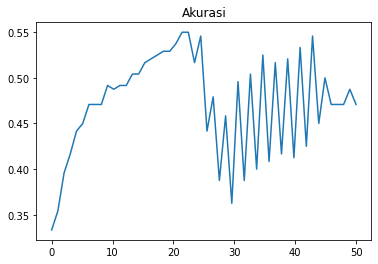

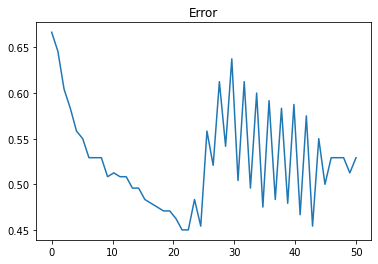

In [52]:
# Visualize
def visualize(arr, title=''):
    x_axis = np.linspace(0, len(arr), len(arr))
    plt.plot(x_axis, arr)
    # plt.axis([0,len(arr), 0, 1])
    plt.title(title)
    plt.show()

print("Visualisasi Akurasi - Error (LR 0.1):")   
visualize(accList, 'Akurasi')
# print(accList)
visualize(errorList, 'Error')
# accList

#### Learning Rate 0.8

In [53]:
print("TRAINING (LR 0.8)")
(input_unit, hidden_unit, output_unit) = defineStructure(X_train, Y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))
parameters, accList, errorList, predictions = training(X_train, Y_train, 80, num_iterations=50, learning_rate=0.8)
# print(predictions)
# # print(Y_train)
# print(np.argmax(Y_train, axis=0))

TRAINING (LR 0.8)
The size of the input layer is:  = 76800
The size of the hidden layer is:  = 80
The size of the output layer is:  = 3
76800 80 3
[Cost, Acc, Err] after iteration 0: 2.082655 0.333333 0.666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[Cost, Acc, Err] after iteration 5: 28.224137 0.333333 0.666667
[Cost, Acc, Err] after iteration 10: 17.176337 0.333333 0.666667
[Cost, Acc, Err] after iteration 15: 9.782839 0.333333 0.666667
[Cost, Acc, Err] after iteration 20: 28.147974 0.333333 0.666667
[Cost, Acc, Err] after iteration 25: 17.334399 0.333333 0.666667
[Cost, Acc, Err] after iteration 30: 9.389773 0.333333 0.666667
[Cost, Acc, Err] after iteration 35: 27.311323 0.333333 0.666667
[Cost, Acc, Err] after iteration 40: 20.131346 0.333333 0.666667
[Cost, Acc, Err] after iteration 45: 7.850061 0.333333 0.666667


In [54]:
print("TESTING (LR 0.8)")
predictions = prediction(parameters, X_test, Y_test)
acc, err = accuracy(predictions, Y_test)
print ("[Acc, Err] for testing data: %f %f" %(acc, err))

TESTING (LR 0.8)
[Acc, Err] for testing data: 0.333333 0.666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Visualisasi Akurasi - Error (LR 0.8):


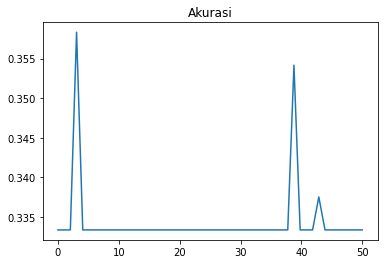

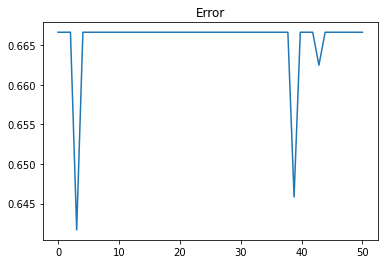

In [56]:
# Visualize
def visualize(arr, title=''):
    x_axis = np.linspace(0, len(arr), len(arr))
    plt.plot(x_axis, arr)
    # plt.axis([0,len(arr), 0, 1])
    plt.title(title)
    plt.show()

print("Visualisasi Akurasi - Error (LR 0.8):")    
visualize(accList, 'Akurasi')
# print(accList)
visualize(errorList, 'Error')
# accList